## Working on books from different authors, different languages, and different topics
* book length
* number of unique words
* how attrubutes are clustered by language or author

Books downloaded from Gutenberg


### Languages:
* English
* French
* German
* Portuguese
For each language 1-4 authors

### Total no of Authors:
* 13 

For each author 1-16 books

### Total no of Books:
* 102


## count the number of times a unique word appears in a given string text - 1


In [97]:
text = "This is my test text. We are keeping this text short to keep thigs manageable."

def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where 
    keys are unique words and values are word counts. Skip punctuation.
    """
    text = text.lower() # prevent double counting of words with capital letter
    skips = [".", ",", ";", "!", "?", ":", "'", '"'] # chars to skip to prevent double counting 
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "): # split returns a list of words in text
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else:
            word_counts[word] = 1
    return word_counts

        
count_words(text)    
 

{'are': 1,
 'is': 1,
 'keep': 1,
 'keeping': 1,
 'manageable': 1,
 'my': 1,
 'short': 1,
 'test': 1,
 'text': 2,
 'thigs': 1,
 'this': 2,
 'to': 1,
 'we': 1}

## count the number of times a unique word appears in a given string text - 2


In [98]:
from collections import Counter

text = "This is my test text. We are keeping this text short to keep thigs manageable."

def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary where 
    keys are unique words and values are word counts. Skip punctuation.
    """
    text = text.lower() # prevent double counting of words with capital letter
    skips = [".", ",", ";", "!", "?", ":", "'", '"'] # chars to skip to prevent double counting 
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

        
count_words_fast(text)    
 


Counter({'are': 1,
         'is': 1,
         'keep': 1,
         'keeping': 1,
         'manageable': 1,
         'my': 1,
         'short': 1,
         'test': 1,
         'text': 2,
         'thigs': 1,
         'this': 2,
         'to': 1,
         'we': 1})

### do the objects returned from the above functions are the same?


In [99]:
count_words(text) == count_words_fast(text)

True

In [100]:
count_words(text) is count_words_fast(text)

False

### Reading in a book

In [101]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\r", "").replace("\n", "")
    return text

In [102]:
text = read_book("/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/English/shakespeare/Romeo and Juliet.txt")
print("No of words in Romeo and Juliet: ", len(text))
ind = text.find("What's in a name?")
print("What's in a name? starts at index: ", ind)
print()
sample_text = text[ind:ind+1000]
print(sample_text)

No of words in Romeo and Juliet:  169275
What's in a name? starts at index:  42757

What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefo

## Compute some basic word frequency statistics
compare different translations of the same book


In [103]:
def word_stats(word_counts):
    """ Return no of unique words and word frequencies (a list of word counts)"""
    num_unique = len(word_counts) # no of total unique words
    counts = word_counts.values() # no of each word
    return(num_unique, counts) # returning a tuple
    
    

In [104]:
text = read_book("/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
#print(word_counts)
print()
(num_unique, counts) = word_stats(word_counts)
print("no of unique words in Romeo and Juliet: ", num_unique)
print("sum of all words in Romeo and Juliet: ", sum(counts))


no of unique words in Romeo and Juliet:  4671
sum of all words in Romeo and Juliet:  40776


### Compare English with German version of Romeo and Juliet

In [105]:
text = read_book("/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print("no of unique words in Romeo and Juliet in English: ", num_unique)
print("sum of all words in Romeo and Juliet in English: ", sum(counts))
print()
text = read_book("/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print("no of unique words in Romeo and Juliet in German: ", num_unique)
print("sum of all words in Romeo and Juliet in German: ", sum(counts))


no of unique words in Romeo and Juliet in English:  4671
sum of all words in Romeo and Juliet in English:  40776

no of unique words in Romeo and Juliet in German:  7328
sum of all words in Romeo and Juliet in German:  20311


# pandas

In [117]:
import os

book_dir = "/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
print("no of unique words in all 102 books: ", num_unique)
print("sum of all words in all the books: ", sum(counts))



/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Wallensteins Lager.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/die braut von messina.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Kabale und Liebe.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Huldigung der KÅnste.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Der Neffe als Onkel.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Piccolomini.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die

/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/Le Horla.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/L'inutile beautÇ.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/Boule de Suif.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/La Maison Tellier.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/L'oiseau blanc.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Les deux amis de Bourbonne.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Regrets sur ma vieille robe de chambre.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Ceci n'est pas un conte.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Entretien d'un päre avec ses enf

## Use pandas to save book stats in a table

In [131]:
import pandas as pd

# create a table using the pandas data frame
# table = pd.DataFrame(columns = ("name", "age"))
# table.loc[1] = "James", 22 # this is the first rwo of the table
# table.loc[2] = "Jack", 43
# print(table)
# print(table.columns)
# access the column "age"
# table.age or table["age"]
# select only rows where age is 22
# table[table.age == 22]

import os

book_dir = "/Users/Beeta/Pythoncodes/python4research/Language_processing/Books/"
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique 
            title_num += 1
            
            
print("no of unique words in all 102 books: ", num_unique)
print("sum of all words in all the books: ", sum(counts))


/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Wallensteins Lager.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/die braut von messina.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Kabale und Liebe.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Huldigung der KÅnste.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Der Neffe als Onkel.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die Piccolomini.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//German/schiller/Die

/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/Le Horla.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/L'inutile beautÇ.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/Boule de Suif.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/de Maupassant/La Maison Tellier.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/L'oiseau blanc.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Les deux amis de Bourbonne.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Regrets sur ma vieille robe de chambre.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Ceci n'est pas un conte.txt
/Users/Beeta/Pythoncodes/python4research/Language_processing/Books//French/diderot/Entretien d'un päre avec ses enf

In [129]:
stats

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4241
2,German,Schiller,die braut von messina,26482,6345
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,5919
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,9996
5,German,Schiller,Kabale und Liebe,30929,9608
6,German,Schiller,Die Huldigung der KÅnste,3919,1725
7,German,Schiller,Der Neffe als Onkel,14349,4228
8,German,Schiller,Die Piccolomini,35456,6489
9,German,Schiller,Die Jungfrau von Orleans,24181,8580
10,German,Schiller,"Turandot, Prinzessin von China",21441,7291


In [132]:
stats.head()

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4241
2,German,Schiller,die braut von messina,26482,6345
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,5919
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,9996
5,German,Schiller,Kabale und Liebe,30929,9608


In [133]:
stats.tail()

,language,author,title,length,unique
98,French,Sand,La Marquise,14716,4756
99,French,Sand,L' Orco,8748,3135
100,French,Sand,Mattea,21089,6391
101,French,Sand,Metella,19600,5646
102,French,Sand,Oeuvres illustrÇes de George Sand,23210,7442


In [134]:
stats.length

1       15443
2       26482
3       20450
4       31128
5       30929
6        3919
7       14349
8       35456
9       24181
10      21441
11      50725
12      23863
13     143699
14      28148
15      12143
16      23660
17       9535
18      28155
19      20484
20      25106
21      16651
22      17912
23      21040
24      16032
25      18855
26      24701
27      21802
28      16568
29      20600
30      16648
        ...  
73      34723
74      25975
75      40688
76      41485
77      37840
78      35905
79      43685
80      21973
81       8510
82       4980
83      10938
84      11125
85      66621
86      55565
87      46306
88      51341
89      40827
90      73801
91      52519
92      12771
93      47831
94     151405
95      85756
96      27486
97      12370
98      14716
99       8748
100     21089
101     19600
102     23210
Name: length, Length: 102, dtype: object

## plotting book stats

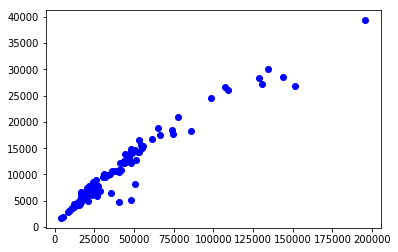

In [135]:
import matplotlib.pyplot as plt

plt.plot(stats.length, stats.unique, "bo") #(x axis, y axis, blue circle)


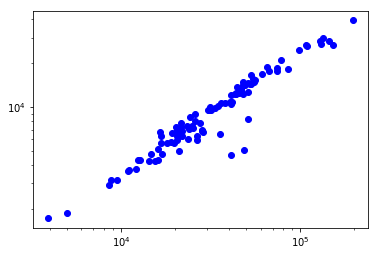

In [136]:
# plot logarithmatcially

plt.loglog(stats.length, stats.unique, "bo")

In [137]:
stats[stats.language == "English"]

,language,author,title,length,unique
35,English,Shakespeare,Othello,26590,5898
36,English,Shakespeare,Richard III,48315,5060
37,English,Shakespeare,The Merchant of Venice,20949,4978
38,English,Shakespeare,A Midsummer Night's Dream,16103,4345
39,English,Shakespeare,Macbeth,16874,4780
40,English,Shakespeare,Hamlet,28551,6776
41,English,Shakespeare,Romeo and Juliet,40776,4671


In [139]:
stats[stats.language == "French"]

,language,author,title,length,unique
71,French,De maupassant,Œuvres complètes de Guy de Maupassant,54772,14943
72,French,De maupassant,La Main Gauche,33481,9842
73,French,De maupassant,Contes de la Becasse,34723,10125
74,French,De maupassant,Claire de Lune,25975,8040
75,French,De maupassant,La petite roque,40688,10774
76,French,De maupassant,Le Horla,41485,10872
77,French,De maupassant,L'inutile beautÇ,37840,10662
78,French,De maupassant,Boule de Suif,35905,10625
79,French,De maupassant,La Maison Tellier,43685,12227
80,French,Diderot,L'oiseau blanc,21973,6275


### craete a plot with different colors for different languages

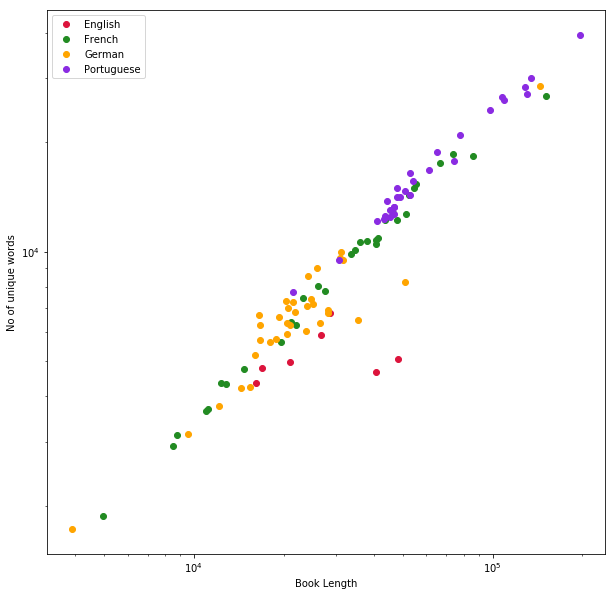

In [141]:
# html colors

plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")

plt.legend()
plt.xlabel("Book Length")
plt.ylabel("No of unique words")
plt.savefig("language_plot.pdf")

